## Importing Dependencies



In [1]:
import numpy as np
import math
import pandas as pd
import re
import time

try:
    %tensorflow_version 2.x
except:
    pass

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
en = "/content/drive/MyDrive/Deep_Learning/BERT&Transformer/Model_NLP/Data/nonbreaking_prefix.en"
fr = "/content/drive/MyDrive/Deep_Learning/BERT&Transformer/Model_NLP/Data/nonbreaking_prefix.fr"
europarl_en_path = "/content/drive/MyDrive/Deep_Learning/BERT&Transformer/Model_NLP/Data/fr-en/europarl-v7.fr-en.en"
europarl_fr_path = "/content/drive/MyDrive/Deep_Learning/BERT&Transformer/Model_NLP/Data/fr-en/europarl-v7.fr-en.fr"

with open(europarl_en_path,mode = "r",encoding = "utf-8") as f:
    europarl_en = f.read()

with open(europarl_fr_path,mode = "r",encoding = "utf-8") as f:
    europarl_fr = f.read()

with open(en,mode = "r", encoding = "utf-8") as f:
    nonbreaking_en = f.read()

with open(fr,mode = "r", encoding = "utf-8") as f:
    nonbreaking_fr = f.read()

In [4]:
print(nonbreaking_en.split("\n"), end = " ")

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'messrs', 'mlle', 'mme', 'mr', 'mrs', 'ms', 'ph', 'prof', 'sr', 'st', 'a.m', 'p.m', 'vs', 'i.e', 'e.g'] 

In [5]:
print(nonbreaking_fr.split("\n"), end = " ")

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'mme', 'mlle', 'c.-à-d', 'cf', 'chap', 'e.g', 'al', 'etc', 'ex', 'fig', 'suiv', 'sup', 'suppl', 'tél', 'vol', 'vs'] 

In [6]:
europarl_en[:50]

'Resumption of the session\nI declare resumed the se'

In [7]:
europarl_fr[:50]

'Reprise de la session\nJe déclare reprise la sessio'

## Cleaning

In [8]:
nonbreaking_en = nonbreaking_en.split("\n")
nonbreaking_en = [" " + pref + "." for pref in nonbreaking_en]
print(nonbreaking_en)

[' a.', ' b.', ' c.', ' d.', ' e.', ' f.', ' g.', ' h.', ' i.', ' j.', ' k.', ' l.', ' m.', ' n.', ' o.', ' p.', ' q.', ' r.', ' s.', ' t.', ' u.', ' v.', ' w.', ' x.', ' y.', ' z.', ' messrs.', ' mlle.', ' mme.', ' mr.', ' mrs.', ' ms.', ' ph.', ' prof.', ' sr.', ' st.', ' a.m.', ' p.m.', ' vs.', ' i.e.', ' e.g.']


In [9]:
nonbreaking_fr = nonbreaking_fr.split("\n")
nonbreaking_fr = [" " + pref + "." for pref in nonbreaking_fr]
print(nonbreaking_fr)

[' a.', ' b.', ' c.', ' d.', ' e.', ' f.', ' g.', ' h.', ' i.', ' j.', ' k.', ' l.', ' m.', ' n.', ' o.', ' p.', ' q.', ' r.', ' s.', ' t.', ' u.', ' v.', ' w.', ' x.', ' y.', ' z.', ' mme.', ' mlle.', ' c.-à-d.', ' cf.', ' chap.', ' e.g.', ' al.', ' etc.', ' ex.', ' fig.', ' suiv.', ' sup.', ' suppl.', ' tél.', ' vol.', ' vs.']


In [ ]:
corpus_en = europarl_en
for prefix in nonbreaking_en:
    corpus_en = corpus_en.replace(prefix,prefix + "###")
corpus_en = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])",".###",corpus_en)

In [ ]:
# 2591,2595
extra_pad = 40
start,end = re.search(".###",corpus_en).span()
print(corpus_en[start-extra_pad:end+extra_pad])
print()
print(europarl_en[start-extra_pad:end+extra_pad])

may, if you wish, raise this question, i.###e. on Thursday prior to the start of the

may, if you wish, raise this question, i.e. on Thursday prior to the start of the pr


In [ ]:
corpus_en = re.sub(r"\.###","",corpus_en)
print(corpus_en[start-extra_pad:end+extra_pad])
print()
print(europarl_en[start-extra_pad:end+extra_pad])

may, if you wish, raise this question, ie. on Thursday prior to the start of the pre

may, if you wish, raise this question, i.e. on Thursday prior to the start of the pr


In [ ]:
corpus_en = re.sub(r"  +"," ",corpus_en)
corpus_en = corpus_en.split("\n")

In [10]:
corpus_en = europarl_en
for prefix in nonbreaking_en:
    corpus_en = corpus_en.replace(prefix,prefix + "###")
corpus_en = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])",".###",corpus_en)
corpus_en = re.sub(r"\.###","",corpus_en)
corpus_en = re.sub(r"  +"," ",corpus_en)
corpus_en = corpus_en.split("\n")

corpus_fr = europarl_fr
for prefix in nonbreaking_fr:
    corpus_fr = corpus_fr.replace(prefix,prefix + "###")
corpus_fr = re.sub(r"\.(?=[0-9]|[a-z]|[A-Z])",".###",corpus_fr)
corpus_fr = re.sub(r"\.###","",corpus_fr)
corpus_fr = re.sub(r"  +"," ",corpus_fr)
corpus_fr = corpus_fr.split("\n")

In [ ]:
print(corpus_en[:3],end = " ")
print()
print(corpus_fr[:3],end = " ")

['Resumption of the session', 'I declare resumed the session of the European Parliament adjourned on Friday 17 December 1999, and I would like once again to wish you a happy new year in the hope that you enjoyed a pleasant festive period.', "Although, as you will have seen, the dreaded 'millennium bug' failed to materialise, still the people in a number of countries suffered a series of natural disasters that truly were dreadful."] 
['Reprise de la session', 'Je déclare reprise la session du Parlement européen qui avait été interrompue le vendredi 17 décembre dernier et je vous renouvelle tous mes vux en espérant que vous avez passé de bonnes vacances.', 'Comme vous avez pu le constater, le grand "bogue de l\'an 2000" ne s\'est pas produit. En revanche, les citoyens d\'un certain nombre de nos pays ont été victimes de catastrophes naturelles qui ont vraiment été terribles.'] 

# Tokenizer Text

In [ ]:
tokenizer_en = tf.keras.preprocessing.text.Tokenizer()
tokenizer_fr = tf.keras.preprocessing.text.Tokenizer()

tokenizer_en.fit_on_texts(corpus_en)
tokenizer_fr.fit_on_texts(corpus_fr)

In [ ]:
# We add Start and End !!! 
VOCAB_SIZE_EN = len(tokenizer_en.word_counts) + 2
VOCAB_SIZE_FR = len(tokenizer_fr.word_counts) + 2
print("Vocab Size En : " , VOCAB_SIZE_EN)
print()
print("Vocab Size Fr : ", VOCAB_SIZE_FR)

Vocab Size En :  120557

Vocab Size Fr :  171138


In [ ]:
def tokenizer_add(tokenizer,corpus,VOCAB_SIZE):
    tokenizer_seq = []
    for sequence in tokenizer.texts_to_sequences(corpus):
        sequence.insert(0,VOCAB_SIZE-2)
        sequence.append(VOCAB_SIZE-1)
        tokenizer_seq.append(sequence)
    return tokenizer_seq

In [ ]:
inputs = tokenizer_add(tokenizer_en,corpus_en,VOCAB_SIZE_EN)
outputs = tokenizer_add(tokenizer_fr,corpus_fr,VOCAB_SIZE_FR)

In [ ]:
inputs[0],outputs[0]

([120555, 4897, 2, 1, 1126, 120556], [171136, 1654, 1, 2, 1199, 171137])

In [ ]:
len(corpus_en),len(corpus_fr)

(2007724, 2007724)

In [11]:
import tensorflow_datasets as tfds
import gc

tokenizer_en = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    corpus_en, target_vocab_size=2**13)


tokenizer_fr = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    corpus_fr, target_vocab_size=2**13)

gc.collect()

VOCAB_SIZE_EN = tokenizer_en.vocab_size + 2
VOCAB_SIZE_FR = tokenizer_fr.vocab_size + 2

inputs = [[VOCAB_SIZE_EN-2] + tokenizer_en.encode(sentence) + [VOCAB_SIZE_EN-1]
          for sentence in corpus_en]

outputs = [[VOCAB_SIZE_FR-2] + tokenizer_fr.encode(sentence) + [VOCAB_SIZE_FR-1]
          for sentence in corpus_fr]

gc.collect()

print("Vocab Size En : " , VOCAB_SIZE_EN)
print()
print("Vocab Size Fr : ", VOCAB_SIZE_FR)
print()

inputs[0]

Vocab Size En :  8190

Vocab Size Fr :  8171



[8188, 4399, 962, 2124, 3, 1, 2528, 8189]

## Remove too long sentences

In [12]:
MAX_LENGTH = 20
idx_to_remove = [ count for count,sent in enumerate(inputs) 
                  if len(sent) > MAX_LENGTH ]

for idx in reversed(idx_to_remove):
    del inputs[idx]
    del outputs[idx]

#####
idx_to_remove = [count for count,sent in enumerate(outputs) if len(sent) > MAX_LENGTH]

for idx in reversed(idx_to_remove):
    del inputs[idx]
    del outputs[idx]

In [13]:
gc.collect()

print("Before En, Fr Length : ", len(europarl_en),len(europarl_fr))
print()
print("After En, Fr Length : ",len(inputs),len(outputs))

Before En, Fr Length :  301210536 335706962

After En, Fr Length :  366063 366063


## Inputs/Outputs Creation

In [14]:
inputs = tf.keras.preprocessing.sequence.pad_sequences(inputs,
                                                      value = 0,
                                                      padding = "post",
                                                      maxlen = MAX_LENGTH)

outputs = tf.keras.preprocessing.sequence.pad_sequences(outputs,
                                                       value = 0,
                                                       padding = "post",
                                                       maxlen = MAX_LENGTH)

In [15]:
inputs[0],outputs[0]

(array([8188, 4399,  962, 2124,    3,    1, 2528, 8189,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([8169, 1248,  800,    1,    3, 5731, 8170,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32))

In [16]:
type(inputs),type(outputs)

(numpy.ndarray, numpy.ndarray)

In [17]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

dataset = tf.data.Dataset.from_tensor_slices((inputs,outputs))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
dataset.element_spec

(TensorSpec(shape=(None, 20), dtype=tf.int32, name=None),
 TensorSpec(shape=(None, 20), dtype=tf.int32, name=None))

In [ ]:
dataset.as_numpy_iterator().next()[0].shape,dataset.as_numpy_iterator().next()[1].shape

((64, 20), (64, 20))

In [ ]:
save_path = "/content/drive/MyDrive/Deep_Learning/BERT&Transformer/Model_NLP/Data"
np.save(f"{save_path}/inputs",inputs,allow_pickle= True)
np.save(f"{save_path}/outputs",outputs,allow_pickle = True)

In [ ]:
tf.data.experimental.save(dataset,f"{save_path}/datasets")

In [ ]:
save_path = "/content/drive/MyDrive/Deep_Learning/BERT&Transformer/Model_NLP/Data"
condition = False
if condition == True:
    print("Start")
    dataset = tf.data.experimental.load(f"{save_path}/datasets")
    inputs = np.load(f"{save_path}/inputs.npy")
    outputs = np.load(f"{save_path}/outputs.npy")

    for (batch_size,(e,d)) in enumerate(datasets):
        print("Batch Shape : {}\nEncoder Shape : {}\nDecoder Shape : {}".format(batch_size,e.shape,d.shape))
        break

    inputs.shape,outputs.shape

Start
Batch Shape : 0
Encoder Shape : (64, 20)
Decoder Shape : (64, 20)


In [ ]:
inputs[0],outputs[0]

(array([8188, 4399,  962, 2124,    3,    1, 2528, 8189,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([8169, 1248,  800,    1,    3, 5731, 8170,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32))

# Model Building

## Embedding

In [18]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self):
        super(PositionalEncoding,self).__init__()

    def get_angles(self,pos, i , d_model):# pos: (seq_len, 1) ,i : (1, d_model)

        angles = 1 / np.power(10000., (2*(i // 2)) / np.float32(d_model))
        return pos*angles # (seq_length,d_model)

    def call(self,inputs):
        seq_length = inputs.shape.as_list()[-2]
        d_model = inputs.shape.as_list()[-1]

        angles = self.get_angles(pos = np.arange(seq_length)[:, np.newaxis], 
                                 i = np.arange(d_model)[np.newaxis, :],
                                 d_model =  d_model)

        angles[:,0::2] = np.sin(angles[:, 0::2])
        angles[:,1::2] = np.cos(angles[:, 1::2])
        pos_encoding = angles[np.newaxis,...]

        return inputs + tf.cast(pos_encoding, tf.float32)

In [ ]:
test = inputs[:3]
print("Test Shape : ", test.shape)

seq_length = test.shape[-2]
d_model = test.shape[-1]
print("Seq Length : ",seq_length)
print("D Model : ", d_model)
print()

pos = np.arange(seq_length)[:,np.newaxis]
i = np.arange(d_model)[np.newaxis ,: ]

print("Pos Shape : ", pos.shape)
print("Pos : \n", pos)
print()
print("i shape : ",i.shape)
print("i : \n", i)
print()

def get_angles(pos, i , d_model):# pos: (seq_len, 1) i : (1, d_model)
    angles = 1 / np.power(10000., (2*(i // 2)) / np.float32(d_model))
    return pos*angles # (seq_length,d_model)
    
angles = get_angles(pos = pos, 
                    i = i, 
                    d_model = d_model).round(2)

print("Even : ")
print(angles[:,0::2])
print()
print("Even Sin : ")
print(np.sin(angles[:,0::2]))
print()
print("Odd : ")
print(angles[:,0::1])
print()
print("Odd Cos : ")
print(np.cos(angles[:,0::2]))

angles[:,0::2] = np.sin(angles[:,0::2])
angles[:,1::2] = np.cos(angles[:,1::2])
print()

print("Last Angles : ")
print(angles)

final = test + tf.cast(angles[np.newaxis,...],tf.int32)

print()
print("Actual :\n ")
print(test)
print()
print("Final Result : \n")
print(final)

Test Shape :  (3, 20)
Seq Length :  3
D Model :  20

Pos Shape :  (3, 1)
Pos : 
 [[0]
 [1]
 [2]]

i shape :  (1, 20)
i : 
 [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]]

Even : 
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.4  0.16 0.06 0.03 0.01 0.   0.   0.   0.  ]
 [2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.  ]]

Even Sin : 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.84147098 0.38941834 0.15931821 0.05996401 0.0299955  0.00999983
  0.         0.         0.         0.        ]
 [0.90929743 0.71735609 0.31456656 0.12963414 0.04997917 0.01999867
  0.00999983 0.         0.         0.        ]]

Odd : 
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [1.   1.   0.4  0.4  0.16 0.16 0.06 0.06 0.03 0.03 0.01 0.01 0.   0.
  0.   0.   0.   0.   0.   0.  ]
 [2.   2.   0.8  0.8  0.32 0.32 0.13 0.13 0.05 0.05 0.02 0.02 0.01 0.01
  0.   

## Attention

In [19]:
def scaled_dot_product_attention(queries, keys, values, mask):
    
    product = tf.matmul(queries,keys,transpose_b = True)

    keys_dim = tf.cast(tf.shape(keys)[-1],tf.float32)
    #print(product.dtype,keys_dim.dtype)

    # !!! tf.cast ekleme !!!
    #scaled_product = tf.cast(product,tf.float32) / tf.math.sqrt(keys_dim)
    scaled_product = product / tf.math.sqrt(keys_dim)


    if mask is not None:
        scaled_product += (mask * -1e9)

    attention = tf.matmul(tf.nn.softmax(scaled_product, axis = -1), values)

    return attention

In [ ]:
print(tokenizer_en.encode(corpus_en[0]))

[4399, 962, 2124, 3, 1, 2528]


## Multi-Head Attetion Sublayer

In [20]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self,nb_proj):
        super(MultiHeadAttention,self).__init__()
        self.nb_proj = nb_proj

    def build(self,input_shape):
        self.d_model = input_shape[-1]
        assert self.d_model % self.nb_proj == 0

        self.d_proj = self.d_model // self.nb_proj

        self.query_lin = tf.keras.layers.Dense(units = self.d_model)
        self.key_lin = tf.keras.layers.Dense(units = self.d_model)
        self.value_lin = tf.keras.layers.Dense(units = self.d_model)

        self.final_lin = tf.keras.layers.Dense(units = self.d_model)

    def split_proj(self,inputs,batch_size): # inputs = (batch_size,seq_length,d_model)
        
        shape = (batch_size,
                 -1,
                 self.nb_proj,
                 self.d_proj)
        
        splited_inputs = tf.reshape(inputs , shape = shape ) # (batch_size, seq_length, nb_proj, d_proj)
        
        return tf.transpose(splited_inputs, perm = [0,2,1,3]) # (batch_size, nb_proj, seq_length, d_proj)

    def call(self,queries,keys,values,mask):
        batch_size = tf.shape(queries)[0]

        queries = self.query_lin(queries)
        keys = self.key_lin(keys)
        values = self.value_lin(values)
 
        queries = self.split_proj(queries,batch_size)
        keys = self.split_proj(keys,batch_size)
        values = self.split_proj(values,batch_size)

        attention = scaled_dot_product_attention(queries,keys,values,mask)

        attention = tf.transpose(attention , perm = [0,2,1,3])

        concat_attention = tf.reshape(attention,
                                      shape = (batch_size,-1,self.d_model))

        outputs = self.final_lin(concat_attention)
        return outputs

## Encoder

In [21]:
class EncoderLayer(tf.keras.layers.Layer):

    def __init__(self,FFN_units,nb_proj,dropout):
        super(EncoderLayer,self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout = dropout

    def build(self,input_shape):
        self.d_model = input_shape[-1]

        self.multi_head_attention = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = tf.keras.layers.Dropout(rate = self.dropout)
        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

        self.dense_1 = tf.keras.layers.Dense(units = self.FFN_units,activation = "relu")
        self.dense_2 = tf.keras.layers.Dense(units = self.d_model )
        
        self.dropout_2 = tf.keras.layers.Dropout(rate = self.dropout)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)
        

    def call(self, inputs, mask, training):

        attention = self.multi_head_attention(inputs,
                                              inputs,
                                              inputs,
                                              mask)
        
        attention = self.dropout_1(attention,training = training)
        # !!! ekleme tf.float32
        #attention = self.norm_1(attention + tf.cast(inputs,tf.float32))
        attention = self.norm_1(attention + inputs)

        outputs = self.dense_1(attention)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_2(outputs,training = training)
        outputs = self.norm_2(outputs + attention)

        return outputs

In [22]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout,
                 vocab_size,
                 d_model,
                 name = "encoder"):
        
        super(Encoder,self).__init__(name = name)
        self.nb_layers = nb_layers
        self.d_model = d_model

        self.embedding = tf.keras.layers.Embedding(vocab_size,d_model)
        self.pos_encoding = PositionalEncoding()
        self.dropout = tf.keras.layers.Dropout(rate = dropout)
        self.enc_layers = [EncoderLayer(FFN_units,
                                        nb_proj,
                                        dropout)
                            for _ in range(nb_layers)]


    def call(self,inputs,mask,training):
        outputs = self.embedding(inputs)
        outputs *= tf.math.sqrt(tf.cast(self.d_model,tf.float32)) 

        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs,training)

        for i in range(self.nb_layers):
            outputs = self.enc_layers[i](outputs,mask,training)
        return outputs


In [ ]:
D_MODEL = 128 # 512
NB_LAYERS = 4 # 6
FFN_UNITS = 512 # 2048
NB_PROJ = 8 # 8
DROPOUT = 0.1 # 0.1

test = inputs[:3]
print("Test Shape : " ,test.shape)
print()

encoder = Encoder(nb_layers = NB_LAYERS,
                  FFN_units = FFN_UNITS,
                  nb_proj = NB_PROJ,
                  vocab_size = VOCAB_SIZE_EN,
                  d_model = D_MODEL,
                  dropout = DROPOUT)

emd_enc = encoder.embedding(test)
emd_enc *= tf.math.sqrt(tf.cast(encoder.d_model,tf.float32)) 

emd_enc.shape

Test Shape :  (3, 20)



TensorShape([3, 20, 128])

In [ ]:
pos_enc = encoder.pos_encoding(emd_enc)
pos_enc = encoder.dropout(pos_enc)
pos_enc.shape

TensorShape([3, 20, 128])

In [ ]:
emd_enc[0][0][:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.44519442,  0.03886129,  0.13762653,  0.24824345,  0.41540578,
        0.5164188 ,  0.1442821 ,  0.49620652, -0.21304484, -0.11438992,
       -0.44695458,  0.03117746, -0.34562966, -0.5554406 , -0.3129539 ,
       -0.11909797,  0.42131594, -0.01829687, -0.18778692, -0.35163054],
      dtype=float32)>

In [ ]:
pos_enc[0][0][:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 0.44519442,  1.0388613 ,  0.13762653,  1.2482435 ,  0.41540578,
        1.5164188 ,  0.1442821 ,  1.4962065 , -0.21304484,  0.8856101 ,
       -0.44695458,  1.0311774 , -0.34562966,  0.4445594 , -0.3129539 ,
        0.88090205,  0.42131594,  0.9817031 , -0.18778692,  0.64836943],
      dtype=float32)>

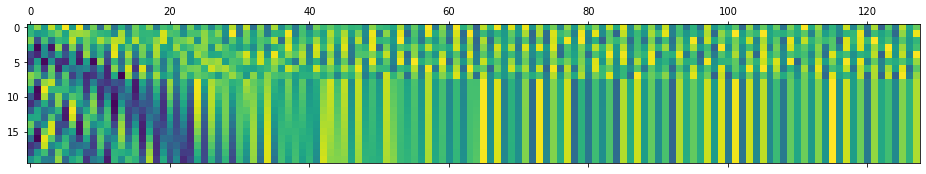

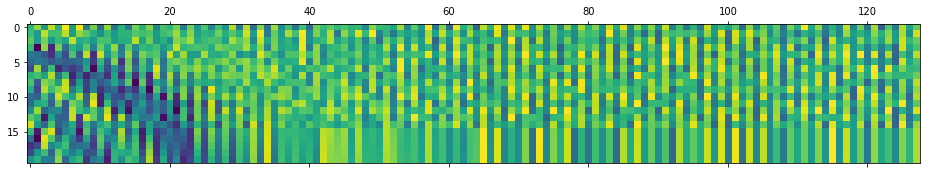

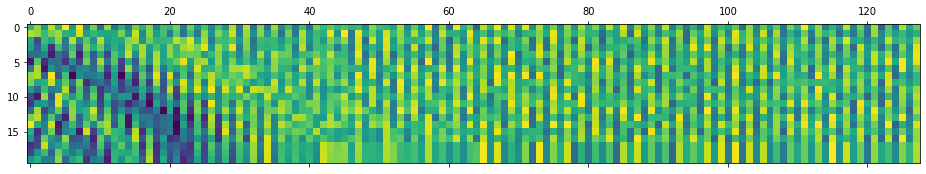

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(3):
    plt.matshow(pos_enc[i])

In [ ]:
# MultiHeadAttention & 

pos_enc.shape,NB_PROJ

(TensorShape([3, 20, 128]), 8)

In [ ]:
encoder_multihead = MultiHeadAttention(nb_proj = NB_PROJ)
encoder_multihead.build(pos_enc.shape)

print("Query Linear : ", encoder_multihead.query_lin(pos_enc).shape)

# dim = 128. -- > 128 / 8 --> 16 
# (batch_size, seq_length, nb_proj, d_proj)
# Select myself batch_size = 3
split_pos = encoder_multihead.split_proj(pos_enc,3)
split_pos.shape

Query Linear :  (3, 20, 128)


TensorShape([3, 8, 20, 16])

In [ ]:
# Scaled Dot Product  Step by Step
# Before this process some apply linear_apply

print("Inputs Shape : ",split_pos.shape)
product = tf.matmul(split_pos,split_pos,transpose_b = True)
keys_dim = tf.cast(tf.shape(split_pos)[-1],tf.float32)


# You mask create (batch_size, : ,:, :) check mask part !!!
# Select length -- > seq len that part !!!
# Example -- > (3,1,20,20) or (3,1,1,20)

scaled_product = product / tf.math.sqrt(keys_dim)
print("Scaled Product : ",scaled_product.shape )
soft_max = tf.nn.softmax(scaled_product,axis = -1)
attention = tf.matmul(soft_max,split_pos)
print("Final Attention : ", attention.shape)

Inputs Shape :  (3, 8, 20, 16)
Scaled Product :  (3, 8, 20, 20)
Final Attention :  (3, 8, 20, 16)


In [ ]:
# 3 -- > Batch Size !!!
attention = tf.transpose(attention,perm = [0,2,1,3])
attention = tf.reshape(attention,shape=(3, -1, encoder_multihead.d_model))
print("Multi Final Attention : ", attention.shape)

Multi Final Attention :  (3, 20, 128)


In [ ]:
encoder_multihead.final_lin(attention).shape

TensorShape([3, 20, 128])

In [ ]:
# Final Part !!! The same above process !!!
encoder_multihead(pos_enc,pos_enc,pos_enc,None).shape

TensorShape([3, 20, 128])

In [ ]:
pos_enc.shape

TensorShape([3, 20, 128])

## Decoder

In [23]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self,
                 FFN_units,
                 nb_proj,
                 dropout):
        super(DecoderLayer,self).__init__()
        self.FFN_units = FFN_units
        self.nb_proj = nb_proj
        self.dropout = dropout

    def build(self,input_shape):
        self.d_model = input_shape[-1]

        self.multi_head_attention_1 = MultiHeadAttention(self.nb_proj)
        self.dropout_1 = tf.keras.layers.Dropout(rate = self.dropout)
        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

        self.multi_head_attention_2 = MultiHeadAttention(self.nb_proj)
        self.dropout_2 = tf.keras.layers.Dropout(rate = self.dropout)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

        self.dense_1 = tf.keras.layers.Dense(units = self.FFN_units,activation = "relu")
        self.dense_2 = tf.keras.layers.Dense(units = self.d_model)

        self.dropout_3 = tf.keras.layers.Dropout(rate = self.dropout)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon = 1e-6)

    def call(self,inputs,enc_outputs,mask_1,mask_2,training):

        attention = self.multi_head_attention_1(inputs,
                                                inputs,
                                                inputs,
                                                mask_1)

        attention = self.dropout_1(attention,training = training)
        attention = self.norm_1(attention + inputs)

        attention_2 = self.multi_head_attention_2(attention,
                                                  enc_outputs,
                                                  enc_outputs,
                                                  mask_2)
        
        attention_2 = self.dropout_2(attention_2,training = training)
        attention_2 = self.norm_2(attention_2 + attention)

        outputs = self.dense_1(attention_2)
        outputs = self.dense_2(outputs)
        outputs = self.dropout_3(outputs,training = training)
        outputs = self.norm_3(outputs+attention_2)

        return outputs

In [24]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout,
                 vocab_size,
                 d_model,
                 name = "decoder"):
        super(Decoder,self).__init__(name = name)
        self.nb_layers = nb_layers
        self.d_model = d_model


        self.embedding = tf.keras.layers.Embedding(vocab_size,d_model)
        self.pos_encoding = PositionalEncoding()
        self.dropout = tf.keras.layers.Dropout(rate = dropout)

        self.dec_layers = [DecoderLayer(FFN_units,
                                        nb_proj,
                                        dropout)
                            for _ in range(nb_layers)]

    def call(self,inputs,enc_outputs,mask_1,mask_2, training):

        outputs = self.embedding(inputs)
        outputs *=tf.math.sqrt(tf.cast(self.d_model,tf.float32))
        outputs = self.pos_encoding(outputs)
        outputs = self.dropout(outputs,training)

        for i in range(self.nb_layers):
            outputs = self.dec_layers[i](outputs,
                                         enc_outputs,
                                         mask_1,
                                         mask_2,
                                         training)

        return outputs

Test Decoder Shape :  (3, 19)
Test Encoder Shape :  (3, 20)
Pos Dec Shape :  (3, 19, 128)


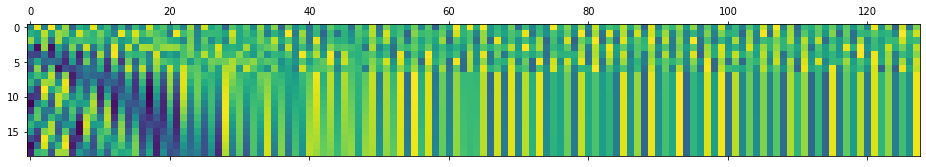

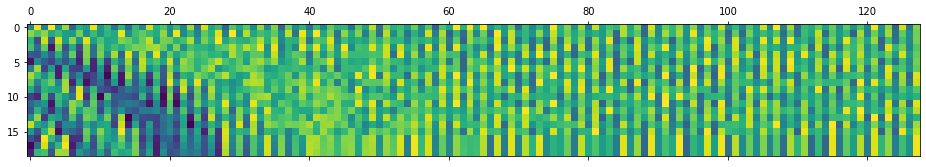

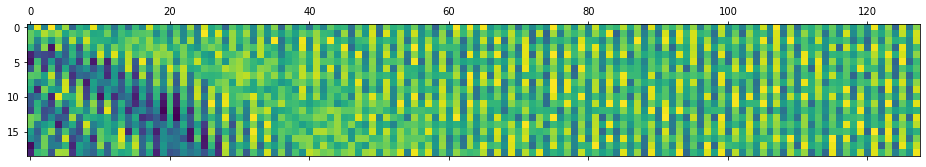

In [ ]:
test_dec = outputs[:3]
test_dec_ = test_dec[:,:-1]
print("Test Decoder Shape : ", test_dec_.shape)
print("Test Encoder Shape : ", test.shape)

decoder = Decoder(nb_layers = NB_LAYERS,
                  FFN_units = FFN_UNITS,
                  nb_proj = NB_PROJ,
                  vocab_size = VOCAB_SIZE_FR,
                  d_model = D_MODEL,
                  dropout = DROPOUT)


emd_dec = decoder.embedding(test_dec_)
emd_dec *= tf.math.sqrt(tf.cast(decoder.d_model,tf.float32)) 

pos_dec = decoder.pos_encoding(emd_dec)
print("Pos Dec Shape : ",pos_dec.shape)

import matplotlib.pyplot as plt
%matplotlib inline

for i in range(3):
    plt.matshow(pos_dec[i])

In [ ]:
# MultiHeadAttention & 

pos_dec.shape,NB_PROJ

(TensorShape([3, 19, 128]), 8)

In [ ]:
decoder_multihead = MultiHeadAttention(nb_proj = NB_PROJ)
decoder_multihead.build(pos_dec.shape)

# dim = 128. -- > 128 / 8 --> 16 
# (batch_size, seq_length, nb_proj, d_proj)
# Select myself batch_size = 3
split_pos_dec = decoder_multihead.split_proj(pos_dec,3)
split_pos_dec.shape

TensorShape([3, 8, 19, 16])

In [ ]:
# Scaled Dot Product  Step by Step
# Before this process some apply linear_apply
# Split_pos -- > come from encoder 

print("Inputs Shape : ",split_pos_dec.shape)
product = tf.matmul(split_pos_dec,split_pos_dec,transpose_b = True)
keys_dim = tf.cast(tf.shape(split_pos_dec)[-1],tf.float32)
scaled_product = product / tf.math.sqrt(keys_dim)
print("Scaled Product : ",scaled_product.shape )
soft_max = tf.nn.softmax(scaled_product,axis = -1)
attention = tf.matmul(soft_max,split_pos_dec)
print("Final Attention : ", attention.shape)

Inputs Shape :  (3, 8, 19, 16)
Scaled Product :  (3, 8, 19, 19)
Final Attention :  (3, 8, 19, 16)


In [ ]:
attention = tf.transpose(attention,perm = [0,2,1,3])
attention = tf.reshape(attention,shape=(3, -1, decoder_multihead.d_model))
print("Multi Final Attention : ", attention.shape)

Multi Final Attention :  (3, 19, 128)


In [ ]:
decoder_multihead.final_lin(attention).shape

TensorShape([3, 19, 128])

In [ ]:
# Final Part !!! The same above process !!!
decoder_multihead(pos_dec,pos_dec,pos_dec,None).shape

TensorShape([3, 19, 128])

---

In [ ]:
pos_enc.shape,pos_dec.shape

(TensorShape([3, 20, 128]), TensorShape([3, 19, 128]))

In [ ]:
dec_lay = DecoderLayer(FFN_units=  FFN_UNITS,
                       nb_proj = NB_PROJ,
                       dropout = DROPOUT)
dec_lay.build(pos_dec.shape)

dec_lay.multi_head_attention_1(pos_dec,pos_dec,pos_dec,None).shape

TensorShape([3, 19, 128])

In [ ]:
dec_lay.multi_head_attention_2(pos_dec,pos_enc,pos_enc,None).shape

TensorShape([3, 19, 128])

In [ ]:
(dec_lay.multi_head_attention_1(pos_dec,pos_enc,pos_enc,None) + dec_lay.multi_head_attention_1(pos_dec,pos_dec,pos_dec,None)).shape

TensorShape([3, 19, 128])

In [ ]:
print("Split Dec : {}\nSplit Enc : {}".format(split_pos_dec.shape,split_pos.shape))

_product = tf.matmul(split_pos_dec, split_pos, transpose_b=True)
_keys_dim = tf.cast(tf.shape(split_pos)[-1], tf.float32)
_scaled_product = _product / tf.math.sqrt(_keys_dim)
print("Scaled Product Shape : ", _scaled_product.shape)

mask = None
if mask is not None:
    scaled_product += (mask * -1e9)

_attention = tf.matmul(tf.nn.softmax(_scaled_product, axis=-1), split_pos)
print("Attention Shape : ", _attention.shape)

Split Dec : (3, 8, 19, 16)
Split Enc : (3, 8, 20, 16)
Scaled Product Shape :  (3, 8, 19, 20)
Attention Shape :  (3, 8, 19, 16)


In [ ]:
_attention = tf.transpose(_attention,perm = [0,2,1,3])
_attention = tf.reshape(_attention,shape=(3, -1, decoder_multihead.d_model))
print("Multi Final Attention : ", _attention.shape)

Multi Final Attention :  (3, 19, 128)


In [ ]:
decoder_multihead.final_lin(_attention).shape

TensorShape([3, 19, 128])

In [ ]:
# Final Part !!! The same above process !!!
decoder_multihead(pos_dec,pos_enc,pos_enc,None).shape

TensorShape([3, 19, 128])

## Transformer

In [ ]:
def create_padding_mask(seq): # seq : (batch_size , seq_length)
    mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return mask[:,tf.newaxis,tf.newaxis, : ]

def create_look_ahead_mask(seq):
    seq_len = tf.shape(seq)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len,seq_len)), -1, 0)
    return look_ahead_mask

In [ ]:
seq = tf.cast([[837,836,0,273,8,0,0,0]], tf.int32)
seq.shape,create_padding_mask(seq).shape,create_look_ahead_mask(seq).shape

(TensorShape([1, 8]), TensorShape([1, 1, 1, 8]), TensorShape([8, 8]))

In [ ]:
# We use 4 dims because we split inputs vector #(batch_size,nb_proj,seq_length,d_proj)
tf.maximum(create_padding_mask(seq),create_look_ahead_mask(seq)).shape

TensorShape([1, 1, 8, 8])

In [ ]:
create_padding_mask(seq)

<tf.Tensor: shape=(1, 1, 1, 8), dtype=float32, numpy=array([[[[0., 0., 1., 0., 0., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
create_look_ahead_mask(seq)

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.maximum(create_padding_mask(seq),create_look_ahead_mask(seq))

<tf.Tensor: shape=(1, 1, 8, 8), dtype=float32, numpy=
array([[[[0., 1., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 1., 1., 1., 1., 1.],
         [0., 0., 1., 0., 1., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.],
         [0., 0., 1., 0., 0., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
print(test.shape,test_dec.shape)

enc_mask = create_padding_mask(test)

dec_mask_1 = tf.maximum(
    create_padding_mask(test_dec),
    create_look_ahead_mask(test_dec)
)

dec_mask_2 = create_padding_mask(test)

print("---")
print(enc_mask.shape)
print(dec_mask_1.shape)
print(dec_mask_2.shape)

(3, 20) (3, 20)
---
(3, 1, 1, 20)
(3, 1, 20, 20)
(3, 1, 1, 20)


In [25]:
class Transformer(tf.keras.Model):
    def __init__(self,
                 vocab_size_enc,
                 vocab_size_dec,
                 d_model,
                 nb_layers,
                 FFN_units,
                 nb_proj,
                 dropout,
                 name = "tranformer"):
        super(Transformer,self).__init__(name = name)

        self.encoder = Encoder(nb_layers,
                               FFN_units,
                               nb_proj,
                               dropout,
                               vocab_size_enc,
                               d_model)
        
        self.decoder = Decoder(nb_layers,
                               FFN_units,
                               nb_proj,
                               dropout,
                               vocab_size_dec,
                               d_model)
        
        self.last_linear = tf.keras.layers.Dense(units = vocab_size_dec)

    def create_padding_mask(self,seq): # seq : (batch_size , seq_length)
        mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
        return mask[:,tf.newaxis,tf.newaxis, : ]

    def create_look_ahead_mask(self,seq):
        seq_len = tf.shape(seq)[1]
        look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len,seq_len)), -1, 0)
        return look_ahead_mask

    def call(self,enc_inputs,dec_inputs,training):

        enc_mask = self.create_padding_mask(enc_inputs)
        dec_mask_1 = tf.maximum(
            self.create_padding_mask(dec_inputs),
            self.create_look_ahead_mask(dec_inputs)
        )

        dec_mask_2 = self.create_padding_mask(enc_inputs)
        
        enc_outputs = self.encoder(enc_inputs,enc_mask,training)
        dec_outputs = self.decoder(dec_inputs,
                                   enc_outputs,
                                   dec_mask_1,
                                   dec_mask_2,
                                   training)
        
        outputs = self.last_linear(dec_outputs)
        return outputs

## Training

In [ ]:
inputs[0],outputs[0]

(array([8188, 4399,  962, 2124,    3,    1, 2528, 8189,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 array([8169, 1248,  800,    1,    3, 5731, 8170,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32))

In [26]:
# Clear All Session !!!! 
tf.keras.backend.clear_session()

#VOCAB_SIZE_EN = 8189
#VOCAB_SIZE_FR = 8170

#HyperParameters
D_MODEL = 128 # 512
NB_LAYERS = 4 # 6
FFN_UNITS = 512 # 2048
NB_PROJ = 8 # 8
DROPOUT = 0.1 # 0.1

transformer = Transformer(vocab_size_enc = VOCAB_SIZE_EN,
                          vocab_size_dec = VOCAB_SIZE_FR,
                          d_model = D_MODEL,
                          nb_layers = NB_LAYERS,
                          FFN_units = FFN_UNITS,
                          nb_proj = NB_PROJ,
                          dropout = DROPOUT)

In [ ]:
for (batch_size,(inputs,targets)) in enumerate(dataset):
    enc_inputs_ = inputs
    dec_inputs_ = targets[:,:-1]
    real_dec = targets[:,1:]
    test_batch = batch_size
    break

In [ ]:
result_transformer = transformer(enc_inputs_,dec_inputs_)

print("Enc Inputs : ",enc_inputs_.shape)
print("Dec Inputs : ",dec_inputs_.shape)
print("Result Transformer : ",result_transformer.shape)

Enc Inputs :  (64, 20)
Dec Inputs :  (64, 19)
Result Transformer :  (64, 19, 8171)


In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True,
                                                            reduction = "none")

mask = tf.math.logical_not(tf.math.equal(dec_inputs_,0))
print("Dec Inputs : ", dec_inputs_.shape)

loss_ = loss_object(real_dec,result_transformer)

mask = tf.cast(mask,dtype = loss_.dtype)
loss_ *= mask
print("Loss : ",loss_.shape)
print("Tf Reduce : ", tf.reduce_mean(loss_))

Dec Inputs :  (64, 19)
Loss :  (64, 19)
Tf Reduce :  tf.Tensor(7.01397, shape=(), dtype=float32)


In [28]:
# Loss and Accuracy Part !!!
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True,
                                                            reduction = "none")

def loss_function(target,pred):
    mask = tf.math.logical_not(tf.math.equal(target,0))
    loss_ = loss_object(target,pred)

    mask = tf.cast(mask,dtype = loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

train_loss = tf.keras.metrics.Mean(name = "train_loss")
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name = "train_accuracy")

In [29]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self,d_model,warmup_steps = 4000):
        super(CustomSchedule,self).__init__()

        self.d_model = tf.cast(d_model,tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self,step):

        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**1-5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1,arg2)


learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                     beta_1 = 0.9,
                                     beta_2 = 0.98,
                                     epsilon = 1e-9)

In [ ]:
tf.math.minimum(np.ones((5,5)),0),tf.math.maximum(np.ones((5,5)),5)

(<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])>,
 <tf.Tensor: shape=(5, 5), dtype=float64, numpy=
 array([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])>)

In [31]:
checkpoint_path = "./Check/"
ckpt = tf.train.Checkpoint(tranformer = transformer,
                           optimizer = optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt,checkpoint_path,max_to_keep = 5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print("Lastes Checkpoint Restored!")

## Training

In [ ]:
EPOCHS = 10
for epoch in range(EPOCHS):
    print("Start Of Epoch : {}".format(epoch + 1))
    start = time.time()

    train_loss.reset_states()
    train_accuracy.reset_states()

    for (batch,(enc_inputs,targets)) in enumerate(dataset):
        
        dec_inputs = targets[:,:-1]
        dec_outputs_real = targets[:,1:]
        
        with tf.GradientTape() as tape:
            predictions= transformer(enc_inputs,dec_inputs,True)
            #print(predictions.shape)
            loss = loss_function(dec_outputs_real,predictions)

        gradients = tape.gradient(loss,transformer.trainable_variables)
        optimizer.apply_gradients(zip(gradients,transformer.trainable_variables))

        train_loss(loss)
        train_accuracy(dec_outputs_real,predictions)

        if batch % 50 == 0:
            print("Epoch : {}, Batch : {}, Loss : {:.4f}, Accuracy : {:.4f}".format(
                epoch+1,batch,train_loss.result(),train_accuracy.result()
            ))

    ckpt_save_path = ckpt_manager.save()
    print("Saving Checkpoint For Epoch {} at {}".format(epoch+1,
                                                        ckpt_save_path))
    
    print("Time Taken For 1 epoch : {} secs\n".format(time.time() - start))

Start Of Epoch : 1
Epoch : 1, Batch : 0, Loss : 6.0586, Accuracy : 0.0000
Epoch : 1, Batch : 50, Loss : 5.5371, Accuracy : 0.0429
Epoch : 1, Batch : 100, Loss : 5.0768, Accuracy : 0.0477
Epoch : 1, Batch : 150, Loss : 4.9019, Accuracy : 0.0493
Epoch : 1, Batch : 200, Loss : 4.8181, Accuracy : 0.0502
Epoch : 1, Batch : 250, Loss : 4.7769, Accuracy : 0.0507
Epoch : 1, Batch : 300, Loss : 4.7377, Accuracy : 0.0510
Epoch : 1, Batch : 350, Loss : 4.7088, Accuracy : 0.0512
Epoch : 1, Batch : 400, Loss : 4.6874, Accuracy : 0.0514
Epoch : 1, Batch : 450, Loss : 4.6718, Accuracy : 0.0515
Epoch : 1, Batch : 500, Loss : 4.6584, Accuracy : 0.0516
Epoch : 1, Batch : 550, Loss : 4.6412, Accuracy : 0.0517
Epoch : 1, Batch : 600, Loss : 4.6260, Accuracy : 0.0518
Epoch : 1, Batch : 650, Loss : 4.6151, Accuracy : 0.0519
Epoch : 1, Batch : 700, Loss : 4.6074, Accuracy : 0.0519
Epoch : 1, Batch : 750, Loss : 4.6037, Accuracy : 0.0520
Epoch : 1, Batch : 800, Loss : 4.6021, Accuracy : 0.0520
Epoch : 1, Batc

## Evaluation

In [ ]:
def evaluate(inp_sentence):
    inp_sentence = \
        [VOCAB_SIZE_EN - 2] + tokenizer_en.encode(inp_sentence) + [VOCAB_SIZE_EN - 1]
    enc_input = tf.expand_dims(inp_sentence,axis = 0)

    output = tf.expand_dims([VOCAB_SIZE_FR - 2], axis = 0)

    for _ in range(MAX_LENGTH):
        predictions = transformer(enc_input,output, False) # (1 ,seq_length, vocab_size_fr)

        prediction = predictions[:,-1:,:]

        prediction_id = tf.cast(tf.argmax(prediction,axis = -1), tf.int32)

        if prediction_id == VOCAB_SIZE_FR-1:

            return tf.squeeze(output,axis = 0)

        output = tf.concat([output,prediction_id],axis = -1)


    return tf.squeeze(output,axis = 0)


evaluate("Hello Word!")

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([8169], dtype=int32)>

In [ ]:
def translate(sentence):
    output = evaluate(sentence).numpy()

    predicted_sentence = tokenizer_fr.decode(
        [i for i in output if i < VOCAB_SIZE_FR-2]
    )

    return predicted_sentence

In [ ]:
translate("Hello Word!")

''